In [1]:
import json
import requests
#from api_keys import weather_api_key
from citipy import citipy
import numpy as np
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [6]:
#North America

# Empty lists to capture datapoints
alerts = []
dates = []
magnitudes = []
magnitude_types = []
locations = []
tsunamis = []
lng = []
lat = []
timestamps = []

# Parameters
min_lng = -170
max_lng = -45
min_lat = 15
max_lat = 80
starttime = '1990-01-01'
endtime = '2021-7-01'
min_magnitude = '5'

# URL
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson'

# Query URL (URL with Parameters)
query_url = f"{url}&minmagnitude={min_magnitude}&starttime={starttime}&endtime={endtime}&minlongitude={min_lng}&maxlongitude={max_lng}&minlatitude={min_lat}&maxlatitude={max_lat}"

# JSON Results for Query URL
response = requests.get(query_url).json()

print(response['metadata']['count'])
# How to determine the number of data points in the JSON, use either len(response['features']) or response['metadata']['count']
#pprint(response)

for i in range(0,response['metadata']['count']):
    alerts.append(response['features'][i]['properties']['alert'])
    timestamps.append(response['features'][i]['properties']['time'])
    magnitudes.append(response['features'][i]['properties']['mag'])
    magnitude_types.append(response['features'][i]['properties']['magType'])
    locations.append(response['features'][i]['properties']['place'])
    tsunamis.append(response['features'][i]['properties']['tsunami'])
    lng.append(response['features'][i]['geometry']['coordinates'][0])
    lat.append(response['features'][i]['geometry']['coordinates'][1])
    dates.append(date.fromtimestamp((response['features'][i]['properties']['time'])/1000))
    


2539


In [7]:
    
na_quakes = pd.DataFrame({"Magnitude":magnitudes, "Unit":magnitude_types,
                            "Alert":alerts, "Location":locations,
                            "Tsunami":tsunamis,"Date":dates,
                            "Longitude":lng, "Latitude":lat, "Timestamp":timestamps})
na_quakes

,Magnitude,Unit,Alert,Location,Tsunami,Date,Longitude,Latitude,Timestamp
0,5.40,mww,green,"11 km NE of Rizo de Oro, Mexico",0,2021-06-19,-92.415000,16.0530,1624129036194
1,5.40,mww,green,"226 km S of Sand Point, Alaska",0,2021-06-18,-160.279900,53.3069,1624010561128
2,5.00,mb,None,"214 km SSE of Sand Point, Alaska",0,2021-06-14,-159.636300,53.4722,1623667314148
3,5.00,ml,None,"31 km SSE of Boca de Yuma, Dominican Republic",0,2021-06-14,-68.496000,18.1195,1623665743030
4,5.25,mw,green,"11km W of Calipatria, CA",0,2021-06-05,-115.634833,33.1400,1622915758820
...,...,...,...,...,...,...,...,...,...
2534,5.80,mw,None,"114 km SSW of Nikolski, Alaska",0,1990-01-08,-169.383000,51.9630,631861119170
2535,5.00,mb,None,"104 km SSW of Nikolski, Alaska",0,1990-01-08,-169.351000,52.0440,631829505230
2536,6.00,mw,None,"107 km SSW of Nikolski, Alaska",0,1990-01-08,-169.446000,52.0380,631827874670
2537,6.00,mw,None,"189 km SW of La Cruz de Loreto, Mexico",0,1990-01-05,-106.795000,18.8630,631564020120


In [8]:
#South America

# Empty lists to capture datapoints
alerts = []
dates = []
magnitudes = []
magnitude_types = []
locations = []
tsunamis = []
lng = []
lat = []
timestamps = []

# Parameters
min_lng = -75
max_lng = -25
min_lat = -55
max_lat = 15
starttime = '1990-01-01'
endtime = '2021-7-01'
min_magnitude = '5'

# URL
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson'

# Query URL (URL with Parameters)
query_url = f"{url}&minmagnitude={min_magnitude}&starttime={starttime}&endtime={endtime}&minlongitude={min_lng}&maxlongitude={max_lng}&minlatitude={min_lat}&maxlatitude={max_lat}"

# JSON Results for Query URL
response = requests.get(query_url).json()

print(response['metadata']['count'])
# How to determine the number of data points in the JSON, use either len(response['features']) or response['metadata']['count']
#pprint(response)

for i in range(0,response['metadata']['count']):
    alerts.append(response['features'][i]['properties']['alert'])
    timestamps.append(response['features'][i]['properties']['time'])
    magnitudes.append(response['features'][i]['properties']['mag'])
    magnitude_types.append(response['features'][i]['properties']['magType'])
    locations.append(response['features'][i]['properties']['place'])
    tsunamis.append(response['features'][i]['properties']['tsunami'])
    lng.append(response['features'][i]['geometry']['coordinates'][0])
    lat.append(response['features'][i]['geometry']['coordinates'][1])
    dates.append(date.fromtimestamp((response['features'][i]['properties']['time'])/1000))

3409


In [9]:
    
sa_quakes = pd.DataFrame({"Magnitude":magnitudes, "Unit":magnitude_types,
                            "Alert":alerts, "Location":locations,
                            "Tsunami":tsunamis,"Date":dates,
                            "Longitude":lng, "Latitude":lat, "Timestamp":timestamps})
sa_quakes

,Magnitude,Unit,Alert,Location,Tsunami,Date,Longitude,Latitude,Timestamp
0,5.6,mww,green,northern Mid-Atlantic Ridge,0,2021-06-26,-44.2416,11.7995,1624730482955
1,5.3,mwr,None,"39 km SSW of Salamanca, Chile",0,2021-06-22,-71.1414,-32.0973,1624389386985
2,5.0,mb,None,South Atlantic Ocean,0,2021-06-21,-47.0016,-52.9462,1624252799716
3,5.0,mb,None,"52 km W of Güiria, Venezuela",0,2021-06-12,-62.7686,10.4856,1623478708328
4,5.1,mww,None,"57 km WSW of San Antonio, Chile",0,2021-06-11,-72.2014,-33.7397,1623468986022
...,...,...,...,...,...,...,...,...,...
3404,5.3,mb,None,"100 km W of Coquimbo, Chile",0,1990-01-20,-72.3590,-29.7900,632859647270
3405,5.0,mb,None,"32 km ESE of Tocopilla, Chile",0,1990-01-12,-69.9160,-22.2280,632168494680
3406,5.5,mw,None,"20 km SE of Atiquipa, Peru",0,1990-01-07,-74.2450,-15.9470,631703203440
3407,5.5,mw,None,"118 km SE of Arica, Chile",0,1990-01-05,-69.5290,-19.2580,631544624300


In [10]:
#Ocean

# Empty lists to capture datapoints
alerts = []
dates = []
magnitudes = []
magnitude_types = []
locations = []
tsunamis = []
lng = []
lat = []
timestamps = []

# Parameters
min_lng = -180
max_lng = -75
min_lat = -70
max_lat = 10
starttime = '1990-01-01'
endtime = '2021-7-01'
min_magnitude = '5'

# URL
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson'

# Query URL (URL with Parameters)
query_url = f"{url}&minmagnitude={min_magnitude}&starttime={starttime}&endtime={endtime}&minlongitude={min_lng}&maxlongitude={max_lng}&minlatitude={min_lat}&maxlatitude={max_lat}"

# JSON Results for Query URL
response = requests.get(query_url).json()

print(response['metadata']['count'])
# How to determine the number of data points in the JSON, use either len(response['features']) or response['metadata']['count']
#pprint(response)

for i in range(0,response['metadata']['count']):
    alerts.append(response['features'][i]['properties']['alert'])
    timestamps.append(response['features'][i]['properties']['time'])
    magnitudes.append(response['features'][i]['properties']['mag'])
    magnitude_types.append(response['features'][i]['properties']['magType'])
    locations.append(response['features'][i]['properties']['place'])
    tsunamis.append(response['features'][i]['properties']['tsunami'])
    lng.append(response['features'][i]['geometry']['coordinates'][0])
    lat.append(response['features'][i]['geometry']['coordinates'][1])
    dates.append(date.fromtimestamp((response['features'][i]['properties']['time'])/1000))

8751


In [11]:
    
ocean_quakes = pd.DataFrame({"Magnitude":magnitudes, "Unit":magnitude_types,
                            "Alert":alerts, "Location":locations,
                            "Tsunami":tsunamis,"Date":dates,
                            "Longitude":lng, "Latitude":lat, "Timestamp":timestamps})
ocean_quakes

,Magnitude,Unit,Alert,Location,Tsunami,Date,Longitude,Latitude,Timestamp
0,5.3,mww,None,Easter Island region,0,2021-06-30,-113.1362,-28.3338,1625065674102
1,5.4,mww,green,southern East Pacific Rise,0,2021-06-28,-109.6464,-33.2886,1624854065644
2,5.0,mb,None,Kermadec Islands region,0,2021-06-26,-176.5396,-28.2083,1624751331716
3,5.1,mww,None,Kermadec Islands region,0,2021-06-26,-176.5157,-28.3544,1624747957280
4,5.4,mww,green,Kermadec Islands region,0,2021-06-26,-176.5479,-28.3334,1624682276709
...,...,...,...,...,...,...,...,...,...
8746,5.3,mw,None,Fiji region,0,1990-01-09,-179.3960,-21.7380,631896178250
8747,5.0,mb,None,"150 km ENE of Neiafu, Tonga",0,1990-01-07,-172.7080,-18.0480,631772257110
8748,5.0,mb,None,"15 km W of Papayal, Peru",0,1990-01-05,-80.8770,-4.0560,631552726240
8749,6.5,mw,None,"118 km ENE of Hihifo, Tonga",0,1990-01-04,-172.8500,-15.3970,631431141040


In [12]:
na_quakes.describe()
sa_quakes.describe()
ocean_quakes.describe()

,Magnitude,Tsunami,Longitude,Latitude,Timestamp
count,8751.000000,8751.000000,8751.000000,8751.000000,8.751000e+03
mean,5.380505,0.006514,-151.383777,-23.171789,1.157762e+12
std,0.394947,0.080448,38.007517,14.389148,2.883045e+11
min,5.000000,0.000000,-179.997000,-69.387000,6.311802e+11
25%,5.100000,0.000000,-177.543750,-30.373650,9.177826e+11
50%,5.300000,0.000000,-174.532000,-21.744000,1.187542e+12
75%,5.600000,0.000000,-114.501550,-16.128450,1.390350e+12
max,8.200000,1.000000,-75.009000,9.995000,1.625066e+12


In [13]:
na_quakes.to_csv("na_quakes.csv", index=False, header=True)
sa_quakes.to_csv("sa_quakes.csv", index=False, header=True)
ocean_quakes.to_csv("ocean_quakes.csv", index=False, header=True)

In [14]:
print(f"The magnitude of the earthquake was {response['features'][0]['properties']['mag']} {response['features'][0]['properties']['magType']}")
print(f"The alert level of the earthquake was {response['features'][0]['properties']['alert']}")
print(f"The location of the earthquake was {response['features'][0]['properties']['place']}")
timestamp = int(response['features'][0]['properties']['time'])/1000
print(timestamp)
dt_object = date.fromtimestamp(timestamp)
print(f"The time of the earthquake was {dt_object}")
print(len(response['features']))
print(response['metadata']['count'])
#query_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2014-01-01&endtime=2014-01-31&minmagnitude='

The magnitude of the earthquake was 5.3 mww
The alert level of the earthquake was None
The location of the earthquake was Easter Island region
1625065674.102
The time of the earthquake was 2021-06-30
8751
8751


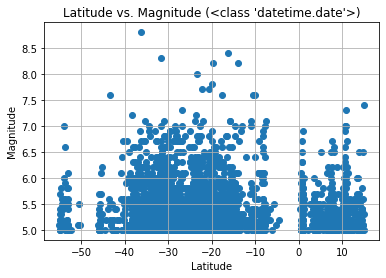

In [17]:
plt.scatter(sa_quakes['Latitude'], sa_quakes['Magnitude'], marker='o')
plt.title(f"Latitude vs. Magnitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.grid()
plt.show()